<a href="https://colab.research.google.com/github/DavidJeonKr/lab_python/blob/master/py26_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   [apt_201910.csv](https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/apt_201910.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
file_path = 'https://raw.githubusercontent.com/JakeOh/202110_itw_lab_python/main/apt_201910.csv'

In [5]:
apt = pd.read_csv(file_path, engine='python', encoding='cp949')

In [6]:
apt.head(4)

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,"10,900",5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,"18,500",10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,"25,000",6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,"20,600",3,2005,경강로2539번길 22


In [7]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  object 
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.9+ MB


'가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
'가격' 컬럼은 숫자 타입이어야 함!

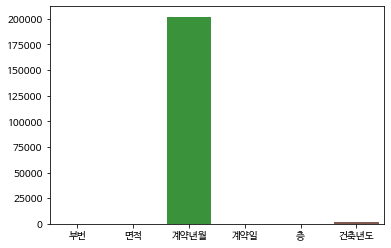

In [8]:
sns.barplot(data=apt)
plt.show()

In [9]:
price = apt['가격'].str.replace(',', '')

In [10]:
apt['가격'] = price

In [11]:
apt['가격'] = apt['가격'].astype('int')

데이터 프레임 파악
info, head, tail, describe, dtypes, ...

In [12]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [13]:
apt.head(4)

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22


In [14]:
apt.tail(4)

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [15]:
apt.describe()

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


In [16]:
apt.dtypes

시군구      object
번지       object
본번       object
부번        int64
단지명      object
면적      float64
계약년월      int64
계약일       int64
가격        int64
층         int64
건축년도      int64
도로명      object
dtype: object

# 시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
* '강원도 강릉시 견소동' -> '강원도'

In [17]:
apt['province'] = apt['시군구'].str.split(' ', expand=True)[0]
apt['city'] = apt['시군구'].str.split(' ', expand=True)[1]

In [18]:
apt.province.value_counts()

경기도        12126
서울특별시       4701
경상남도        2955
인천광역시       2761
부산광역시       2752
대전광역시       2487
충청남도        2045
경상북도        1985
대구광역시       1969
광주광역시       1588
충청북도        1576
울산광역시       1562
전라북도        1394
전라남도        1234
강원도         1143
세종특별자치시      315
제주특별자치도      165
Name: province, dtype: int64

In [19]:
apt.city.value_counts()

서구       1870
북구       1472
남구       1140
동구        955
수원영통구     934
         ... 
연서면         1
진안군         1
청송군         1
울릉군         1
담양군         1
Name: city, Length: 242, dtype: int64

In [20]:
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,city
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충청북도,충주시
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시


'계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
* 201910 -> 2019, 10

In [21]:
apt['계약년월'].value_counts()

201910    42758
Name: 계약년월, dtype: int64

In [22]:
apt['year'] = apt['계약년월'] // 100
apt['month'] = apt['계약년월'] % 100

In [23]:
apt.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '면적', '계약년월', '계약일', '가격', '층', '건축년도',
       '도로명', 'province', 'city', 'year', 'month'],
      dtype='object')

서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값

In [24]:
seoul_apt = apt[apt['province'] == '서울특별시']

In [25]:
# mean에 지수변환이 생기는 이유?????? -> agg 때문인가?? -> aggregate -> result: 가격타입이 object 였어서
seoul_apt.groupby(by='시군구')['가격'].agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
시군구,,,,
서울특별시 강남구 개포동,21,137223.809524,60700,270000
서울특별시 강남구 논현동,3,109333.333333,77000,158000
서울특별시 강남구 대치동,22,192795.454545,30000,373000
서울특별시 강남구 도곡동,23,169347.826087,31800,461000
서울특별시 강남구 삼성동,7,168714.285714,103000,290000
...,...,...,...,...
서울특별시 중랑구 면목동,38,45090.789474,21000,74300
서울특별시 중랑구 묵동,13,45619.230769,11000,73200
서울특별시 중랑구 상봉동,25,53239.200000,13000,91000


* 면적이  84m2  이상  100m2  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [26]:
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,city,year,month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충청북도,충주시,2019,10
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시,2019,10
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시,2019,10
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시,2019,10


In [27]:
area_apt = apt[(apt['가격'] > 82**2) & (apt['가격'] < 100**2)] 

In [28]:
area_apt.groupby(by='시군구')['가격'].agg(['count', 'mean', 'min','max'])

,count,mean,min,max
시군구,,,,
강원도 강릉시 노암동,2,8550.000000,7400,9700
강원도 강릉시 연곡면 영진리,2,8600.000000,7400,9800
강원도 강릉시 입암동,13,8561.538462,6850,9800
강원도 강릉시 주문진읍 교항리,6,7900.000000,6900,8700
강원도 강릉시 초당동,1,7300.000000,7300,7300
...,...,...,...,...
충청북도 충주시 연수동,11,8372.727273,6800,9500
충청북도 충주시 용산동,8,8368.750000,7650,9150
충청북도 충주시 지현동,1,8500.000000,8500,8500


* 면적이  84m2  이상  100m2  미만의 아파트들 중에서, 도/광역시별 아파트 가격 * * 개수, 평균, 최솟값, 최댓값

In [29]:
test = area_apt.groupby(by=['province', 'city'])['가격'].agg(['count', 'mean', 'min', 'max'])
test

count         mean   min   max
province city                                 
강원도      강릉시       35  8365.428571  6800  9800
         고성군        2  6950.000000  6800  7100
         동해시       12  8557.500000  7000  9600
         삼척시       12  7900.000000  6800  9100
         속초시       22  8468.181818  7000  9900
...               ...          ...   ...   ...
충청북도     청주상당구     16  8506.250000  7000  9600
         청주서원구     30  8360.366667  7000  9700
         청주청원구     21  7983.333333  6900  9900
         청주흥덕구     32  7971.875000  6800  9950
         충주시       48  8266.666667  6800  9800

[206 rows x 4 columns]

* 결과를 평균의 내림차순으로 정렬해서 출력

In [30]:
# >>> df.sort_values(by=['col1'])
# ascending=True 기본값
test.sort_values(by='mean', ascending=False )

,,count,mean,min,max
province,city,,,,
대구광역시,서구,1,9900.000000,9900,9900
전라남도,완도군,1,9800.000000,9800,9800
충청북도,괴산군,1,9800.000000,9800,9800
경기도,안양만안구,2,9675.000000,9650,9700
서울특별시,구로구,3,9666.666667,9500,9800
...,...,...,...,...,...
강원도,양양군,3,7033.333333,6800,7400
경기도,수원권선구,1,7000.000000,7000,7000
강원도,고성군,2,6950.000000,6800,7100


* 결과를 최댓값의 내림차순으로 정렬해서 출력

In [31]:
test.sort_values(by='max', ascending=False)

,,count,mean,min,max
province,city,,,,
경기도,평택시,47,8486.808511,6800,9980
광주광역시,광산구,59,8546.101695,6950,9970
경상북도,구미시,57,8314.561404,6800,9950
광주광역시,서구,13,8956.153846,7750,9950
인천광역시,남동구,27,8524.074074,6800,9950
...,...,...,...,...,...
전라남도,곡성군,1,7150.000000,7150,7150
강원도,고성군,2,6950.000000,6800,7100
경기도,수원권선구,1,7000.000000,7000,7000


* 결과를 최솟값의 오름차순으로 정렬해서 출력

In [32]:
test.sort_values(by='min')

,,count,mean,min,max
province,city,,,,
전라북도,군산시,45,8079.333333,6750,9700
경상남도,사천시,18,7862.777778,6750,9900
대전광역시,동구,59,8397.288136,6750,9900
광주광역시,북구,96,8435.937500,6750,9900
경상남도,통영시,21,8057.142857,6750,9700
...,...,...,...,...,...
전라북도,무주군,1,9600.000000,9600,9600
경기도,안양만안구,2,9675.000000,9650,9700
충청북도,괴산군,1,9800.000000,9800,9800
